In [105]:
%matplotlib inline

In [106]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.


['train.csv.zip', 'test.csv', 'test.csv.zip', 'train.csv', 'sample_submission.csv.zip', 'sample_submission.csv']


In [116]:
import mlxtend
import pandas_profiling

import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew #for some statistics

import matplotlib.pyplot as plt


In [108]:
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [109]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


----
# EDA

In [138]:
def checkDataInfo(dataframe):
    """print out dataframe info"""
    print("shape", dataframe.shape)
    print(dataframe.info())
    print(dataframe.describe())
    #pandas_profiling.ProfileReport(dataframe)
    
    print("Is there any nan values? -> ", train_df.isnull().all().all())
    print("counts dtypes\n", dataframe.dtypes.value_counts())
    
    


**次はheck object type columnsの内容をcheckDataInfo()に組み込んでいく**

In [128]:
def checkTargetInfo(dataframe, target_name="y"):
    """print target y value info"""
 
    # plot distribution
    sns.distplot(train_df[target_name], fit=norm)
    (mu, sigma) = norm.fit(train_df[target_name])
    print("mu, sigma:", mu, sigma)

    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('target value distribution')

    
    # plot skewness

    #print("skewness of y", skew(dataframe[target_name]))
    print("skewness of y", train_df[target_name].skew())
    fig = plt.figure()
    res = stats.probplot(train_df[target_name], plot=plt)
    plt.show()



In [136]:
checkDataInfo(train_df)

shape (4209, 378)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB
None
                ID            y          X10     X11          X12  \
count  4209.000000  4209.000000  4209.000000  4209.0  4209.000000   
mean   4205.960798   100.669318     0.013305     0.0     0.075077   
std    2437.608688    12.679381     0.114590     0.0     0.263547   
min       0.000000    72.110000     0.000000     0.0     0.000000   
25%    2095.000000    90.820000     0.000000     0.0     0.000000   
50%    4220.000000    99.150000     0.000000     0.0     0.000000   
75%    6314.000000   109.010000     0.000000     0.0     0.000000   
max    8417.000000   265.320000     1.000000     0.0     1.000000   

               X13          X14          X15          X16          X17  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.057971     0.428130    

mu, sigma: 100.66931812782134 12.6778749695168
skewness of y 1.206525852242492


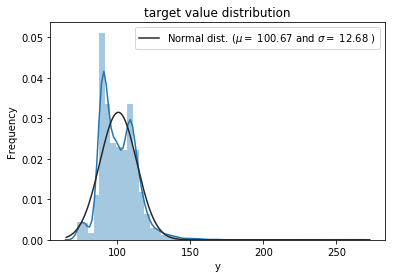

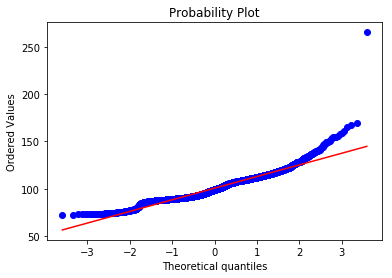

In [129]:
checkTargetInfo(train_df, target_name="y")

In [137]:
checkDataInfo(test_df)

shape (4209, 377)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB
None
                ID          X10          X11          X12          X13  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean   4211.039202     0.019007     0.000238     0.074364     0.061060   
std    2423.078926     0.136565     0.015414     0.262394     0.239468   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%    2115.000000     0.000000     0.000000     0.000000     0.000000   
50%    4202.000000     0.000000     0.000000     0.000000     0.000000   
75%    6310.000000     0.000000     0.000000     0.000000     0.000000   
max    8416.000000     1.000000     1.000000     1.000000     1.000000   

               X14          X15          X16          X17          X18  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
me

np.log1pを適用したが、余り変化なかった


## check object type columns

In [67]:
train_df_object_type = train_df[[x for x in train_df.columns if train_df[x].dtypes == "object"]]
train_df_object_type.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


In [68]:
train_df_object_type.describe()

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,v,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [69]:
train_df_object_type.X0.value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
i      18
am     18
aq     18
u      17
aw     16
l      16
ad     14
b      11
au     11
k      11
r      10
as     10
bc      6
ao      4
c       3
q       2
aa      2
ac      1
ab      1
g       1
Name: X0, dtype: int64

## view correlation

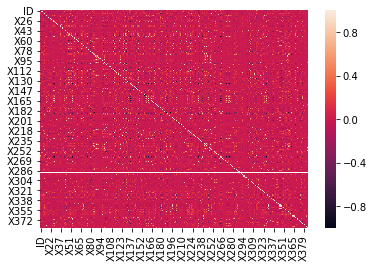

In [70]:
corr = train_df.corr()
sns.heatmap(corr)

In [71]:
corr

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,1.000000,-0.055108,0.001602,NaN,0.058988,-0.031917,-0.025438,0.002237,-0.036480,-0.038171,...,0.045229,-0.080259,-0.022965,0.030371,0.023382,-0.013577,-0.038171,-0.009332,-0.015355,0.029059
y,-0.055108,1.000000,-0.026985,NaN,0.089792,0.048276,0.193643,0.023116,0.048946,-0.159815,...,0.029100,0.114005,0.061403,-0.258679,0.067919,0.040932,-0.159815,0.040291,-0.004591,-0.022280
X10,0.001602,-0.026985,1.000000,NaN,-0.033084,-0.028806,-0.100474,-0.002532,-0.005944,-0.010164,...,0.165277,-0.028618,-0.074244,-0.016870,-0.011374,-0.010479,-0.010164,-0.004740,-0.002532,-0.004387
X11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X12,0.058988,0.089792,-0.033084,NaN,1.000000,0.214825,-0.246513,-0.006212,-0.014584,-0.024937,...,-0.107864,-0.070214,0.030134,-0.016043,-0.027907,-0.005566,-0.024937,-0.011628,-0.006212,-0.010765
X13,-0.031917,0.048276,-0.028806,NaN,0.214825,1.000000,-0.083141,-0.005409,-0.012698,-0.021713,...,-0.169721,-0.061136,0.357229,-0.036040,-0.024299,0.023045,-0.021713,-0.010125,0.041242,-0.009373
X14,-0.025438,0.193643,-0.100474,NaN,-0.246513,-0.083141,1.000000,-0.018865,-0.044291,0.012713,...,0.118950,0.026496,-0.097464,-0.037958,0.103309,0.007743,0.012713,0.023604,0.025199,0.043667
X15,0.002237,0.023116,-0.002532,NaN,-0.006212,-0.005409,-0.018865,1.000000,-0.001116,-0.001908,...,-0.014917,-0.005373,0.032168,-0.003168,-0.002136,-0.001968,-0.001908,-0.000890,-0.000475,-0.000824
X16,-0.036480,0.048946,-0.005944,NaN,-0.014584,-0.012698,-0.044291,-0.001116,1.000000,-0.004480,...,-0.025036,-0.012615,0.045461,-0.007437,-0.005014,-0.004619,-0.004480,-0.002089,-0.001116,-0.001934
X17,-0.038171,-0.159815,-0.010164,NaN,-0.024937,-0.021713,0.012713,-0.001908,-0.004480,1.000000,...,-0.059883,-0.021571,-0.059327,-0.012716,-0.008573,-0.007899,1.000000,-0.003572,-0.001908,-0.003307


In [72]:
corr_values = corr.iloc[0]
print(corr_values.sort_values().head())
print(corr_values.sort_values().tail())

X22    -0.096610
X343   -0.087157
X139   -0.082273
X376   -0.080259
X335   -0.077241
Name: ID, dtype: float64
X290   NaN
X293   NaN
X297   NaN
X330   NaN
X347   NaN
Name: ID, dtype: float64


In [73]:
obj_columns = train_df.select_dtypes(include=['object'])
print(obj_columns.columns)

cat_dims = [train_df.columns.get_loc(i) for i in obj_columns.columns] 
print(cat_dims)

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')
[2, 3, 4, 5, 6, 7, 8, 9]


## see nan

In [74]:
train_df.isna().all().all()

False

In [75]:
test_df.isna().all().all()

False

**no nan value**

----

# feature eng

In [76]:
ntrain = train_df.shape[0]
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
all_data.drop(['y'], axis=1, inplace=True)

In [77]:
all_data.shape

(8418, 377)

## skew feature

In [78]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(
    lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
X233,91.73331
X297,91.73331
X11,91.73331
X235,91.73331
X268,91.73331
X296,91.73331
X295,91.73331
X293,91.73331
X290,91.73331
X330,91.73331


In [79]:
skewness.tail(10)

,Skew
X61,-4.316619
X229,-4.415272
X120,-4.534135
X136,-4.592909
X263,-4.607904
X128,-4.692647
X361,-5.000386
X111,-6.076302
X74,-26.429178
X205,-45.842126


## find binary feature

## Box Cox Transformation of (highly) skewed features

almost all are binary features.

need to exclude binary for trans


----

# prepare train/test data

In [80]:
from sklearn.model_selection import cross_val_score, train_test_split

## with categorical feature
X_train_with_cat, X_test_with_cat, y_train_with_cat, y_test_with_cat

In [81]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [82]:
X_train_df_with_cat = train_df.drop(["y", "ID"], axis=1)
y_train_df = train_df["y"]
id_train_df = train_df["ID"]

In [83]:
X_train_with_cat, X_test_with_cat, y_train_with_cat, y_test_with_cat = train_test_split(
    X_train_df_with_cat, y_train_df, 
    test_size=0.33, random_state=42)
print("train/test data shape", X_train_with_cat.shape, X_test_with_cat.shape)


train/test data shape (2820, 376) (1389, 376)


In [84]:
X_train_df_with_cat.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0


## get object type columns

In [85]:
obj_columns = X_train_df_with_cat.select_dtypes(include=['object'])
print(obj_columns.columns)

cat_dims = [X_train_df_with_cat.columns.get_loc(i) for i in obj_columns.columns] 
print(cat_dims)

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')
[0, 1, 2, 3, 4, 5, 6, 7]


## without categorical feature

X_train, X_test, y_train, y_test

In [86]:
id_train_df = train_df["ID"]
id_test_df = test_df["ID"]

In [87]:
ntrain = train_df.shape[0]
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
all_data.drop(['y', "ID"], axis=1, inplace=True)

print(all_data.shape)
all_data = pd.get_dummies(all_data)
print(all_data.shape)

train_df = all_data[:ntrain]
test_df = all_data[ntrain:]

(8418, 376)
(8418, 579)


In [88]:
train_df.shape

(4209, 579)

In [89]:
train_df.head()

,X10,X100,X101,X102,X103,X104,X105,X106,X107,X108,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [90]:
X_train, X_test, y_train, y_test = train_test_split(
    train_df, y_train_df,
    test_size=0.33, random_state=42)
print("train/test data shape", X_train.shape, X_test.shape)


train/test data shape (2820, 579) (1389, 579)


In [91]:
X_train.head()

,X10,X100,X101,X102,X103,X104,X105,X106,X107,X108,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
2218,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1688,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2242,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
582,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2132,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# model

In [92]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

## SVR

In [93]:
from sklearn.svm import SVR

svr = make_pipeline(
    RobustScaler(),
    SVR(C=1.0 , epsilon=0.01, kernel='rbf', gamma="auto")
#    SVR(C=1.9968596021146288 , epsilon=0.01, kernel='rbf', gamma="auto")
#    SVR(C=7.265222489759383 , epsilon=0.007563549690731845, 
#        gamma=0.000851995393908361, kernel='rbf')
#    {'C': 7.265222489759383, 'epsilon': 0.007563549690731845, 'gamma': 0.000851995393908361, 'kernel': 0}

)
score = cross_val_score(svr, X_train, y_train, scoring="r2", cv=5)

print("svr score: {0} ({1})\n".format(
    score.mean(), score.std()))

svr score: 0.391109234030123 (0.03148912848853115)



In [94]:
score

array([0.34606551, 0.40625795, 0.40134724, 0.43558878, 0.36628669])

## LightGBM

In [95]:
import lightgbm as lgb

In [96]:
model_lgb = lgb.LGBMRegressor(
    objective='regression',
    num_leaves=5,
    learning_rate=0.05,
    n_estimators=720,
    max_bin = 55,
    bagging_fraction = 0.8,
    bagging_freq = 5,
    feature_fraction = 0.2319,
    feature_fraction_seed=9,
    bagging_seed=9,
    min_data_in_leaf =6,
    min_sum_hessian_in_leaf = 11,
#    verbose=1,
#    n_jobs=3
)
score = cross_val_score(model_lgb, X_train, y_train, scoring="r2", cv=5)

print("svr score: {0} ({1})\n".format(
    score.mean(), score.std()))

svr score: 0.5833054261829901 (0.028134317250456523)



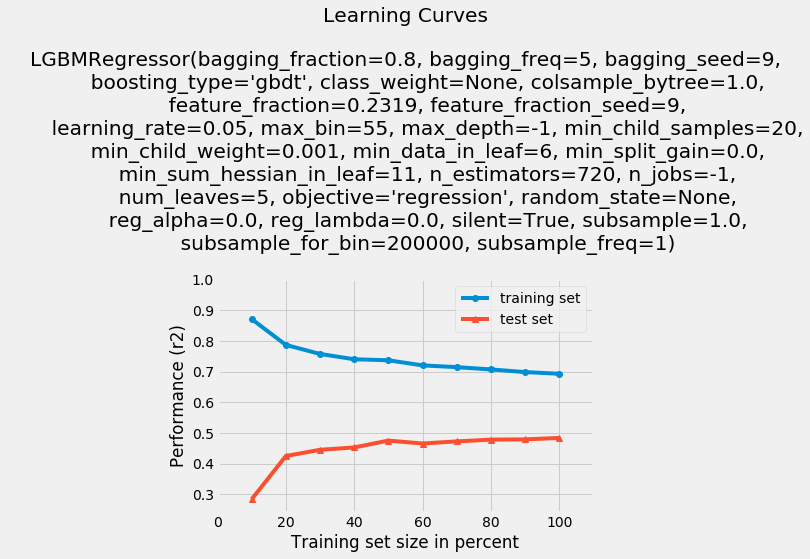

In [97]:
from mlxtend.plotting import plot_learning_curves

plot_learning_curves(X_train, y_train, X_test, y_test,
                     model_lgb, scoring="r2")
plt.show()

### try to fit by all data and predict

In [98]:
model_lgb.fit(train_df, y_train_df)
model_lgb.predict(test_df)

array([ 77.82307667,  92.8082585 ,  78.91390899, ...,  90.58134431,
       111.48254486,  90.45816751])

### tried categorical_feature, but object type is not supported yet.
https://github.com/Microsoft/LightGBM/issues/1020

## catboost

In [99]:
from catboost import CatBoostRegressor

print(list(obj_columns.columns.values))
print(cat_dims)

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
[0, 1, 2, 3, 4, 5, 6, 7]


In [100]:
X_train_with_cat.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
2218,ak,v,r,c,d,k,d,i,0,0,...,0,0,1,0,0,0,0,0,0,0
1688,aw,l,as,d,d,ae,k,l,0,0,...,0,0,0,0,0,0,0,0,0,0
2242,r,c,as,c,d,k,j,u,0,0,...,0,0,1,0,0,0,0,0,0,0
582,y,i,as,d,d,c,j,f,0,0,...,0,0,1,0,0,0,0,0,0,0
2132,v,u,as,c,d,l,j,y,0,0,...,1,0,0,0,0,0,0,0,0,0


In [101]:
catReg = CatBoostRegressor(learning_rate=1,
                          depth=6,
                          loss_function='RMSE')

fit_model = catReg.fit(X_train_with_cat, y_train_with_cat, cat_features=cat_dims)


0:	learn: 12.6009631	total: 16.1ms	remaining: 16.1s
1:	learn: 9.0090776	total: 24.6ms	remaining: 12.3s
2:	learn: 8.7320740	total: 36.9ms	remaining: 12.2s
3:	learn: 8.1198595	total: 52.6ms	remaining: 13.1s
4:	learn: 8.0040150	total: 67.7ms	remaining: 13.5s
5:	learn: 7.9723401	total: 80ms	remaining: 13.3s
6:	learn: 7.9655464	total: 92.8ms	remaining: 13.2s
7:	learn: 7.9517508	total: 106ms	remaining: 13.1s
8:	learn: 7.9506471	total: 111ms	remaining: 12.3s
9:	learn: 7.8370865	total: 123ms	remaining: 12.2s
10:	learn: 7.7996550	total: 135ms	remaining: 12.1s
11:	learn: 7.7696958	total: 154ms	remaining: 12.7s
12:	learn: 7.7495523	total: 169ms	remaining: 12.8s
13:	learn: 7.7358965	total: 178ms	remaining: 12.5s
14:	learn: 7.7233051	total: 192ms	remaining: 12.6s
15:	learn: 7.7080440	total: 202ms	remaining: 12.4s
16:	learn: 7.7063928	total: 217ms	remaining: 12.6s
17:	learn: 7.6905288	total: 231ms	remaining: 12.6s
18:	learn: 7.6213368	total: 244ms	remaining: 12.6s
19:	learn: 7.5962027	total: 259ms	r

# todo

how to use R2 for scorignr

https://tech.yandex.com/catboost/doc/dg/concepts/loss-functions-docpage/

## xgboost

## sklearn GBT

# Make submission file
https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/submissions?sortBy=date&group=all&page=1

In [102]:
sub = pd.DataFrame()
sub['ID'] = id_test_df
sub['y'] = model_lgb.predict(test_df)
sub.to_csv('../output/submission.csv', index=False)
